# Social Media Data Analysis Project 

## Overview
This project simulates analysis of tweet engagement across categories (Food, Family, Health) to derive insights for marketing strategy. It uses Python, Pandas, Matplotlib, and Seaborn.

## Key Skills Demonstrated
- Data Cleaning and Summary Statistics
- Data Visualization and Trend Analysis
- Business Insight Generation
- Python for Real-World Marketing Data

## Insights
- Family content yields the most engagement.
- Food tweets are frequent but less effective.
- Trend visualization helps identify peak posting periods.

## Tools Used
Python, Jupyter Notebook, Pandas, Matplotlib, Seaborn

---

## Contact
Sara Dawson  
[GitHub](https://github.com/sixPawSquad) | [LinkedIn](https://www.linkedin.com/in/sara-dawson2/) | sixpawsquad@gmail.com



In [12]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Random number generation (useful for simulations or sampling)
import random

# Set default plot style
sns.set(style="whitegrid")

In [13]:
# Simulating a dataset of tweets
data = {
    'tweet_id': range(1, 11),
    'text': [
        "Eating healthy food boosts energy!",
        "Love spending time with family ❤️",
        "Workout done for today 💪",
        "Family picnic at the park 🌳",
        "New recipe dropped: Avocado toast 🥑",
        "Health tips for a better life",
        "Trying out Mediterranean diet",
        "Mom and dad are visiting this weekend!",
        "Late-night food cravings 🍕",
        "Fitness is not a destination, it's a journey"
    ],
    'category': ['Food', 'Family', 'Health', 'Family', 'Food', 'Health', 'Food', 'Family', 'Food', 'Health'],
    'likes': [120, 250, 180, 230, 145, 190, 160, 220, 130, 200]
}

df = pd.DataFrame(data)

# Preview the simulated dataset
df.head()


,tweet_id,text,category,likes
0,1,Eating healthy food boosts energy!,Food,120
1,2,Love spending time with family ❤️,Family,250
2,3,Workout done for today 💪,Health,180
3,4,Family picnic at the park 🌳,Family,230
4,5,New recipe dropped: Avocado toast 🥑,Food,145


In [14]:
# Check dataset shape
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Get summary statistics
print("\nSummary statistics:\n")
print(df.describe())

# View category distribution
print("\nTweet categories:\n", df['category'].value_counts())


Dataset shape: (10, 4)

Missing values:
 tweet_id    0
text        0
category    0
likes       0
dtype: int64

Summary statistics:

       tweet_id       likes
count  10.00000   10.000000
mean    5.50000  182.500000
std     3.02765   43.668575
min     1.00000  120.000000
25%     3.25000  148.750000
50%     5.50000  185.000000
75%     7.75000  215.000000
max    10.00000  250.000000

Tweet categories:
 Food      4
Family    3
Health    3
Name: category, dtype: int64


In [15]:
# STEP 3: Cleaning the Data

# Check for duplicate tweet IDs (should be unique)
duplicates = df.duplicated(subset='tweet_id').sum()
print(f"Duplicate tweet IDs: {duplicates}")

# Drop any duplicate rows (if they exist)
df = df.drop_duplicates()

# Check for missing or null values again
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Optional: Standardize category names (e.g., trim whitespace, title case)
df['category'] = df['category'].str.strip().str.title()

# Confirm category values after cleanup
print("\nUnique categories:\n", df['category'].unique())


Duplicate tweet IDs: 0

Missing values after cleaning:
 tweet_id    0
text        0
category    0
likes       0
dtype: int64

Unique categories:
 ['Food' 'Family' 'Health']


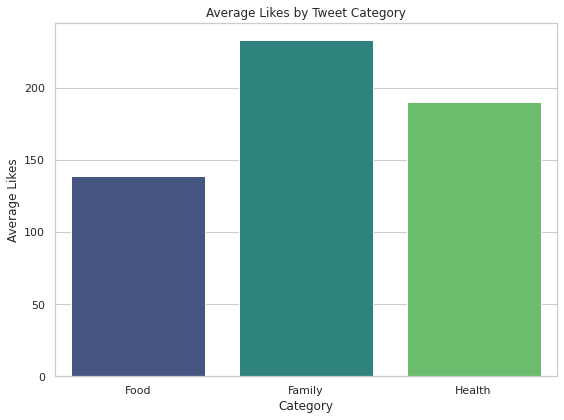

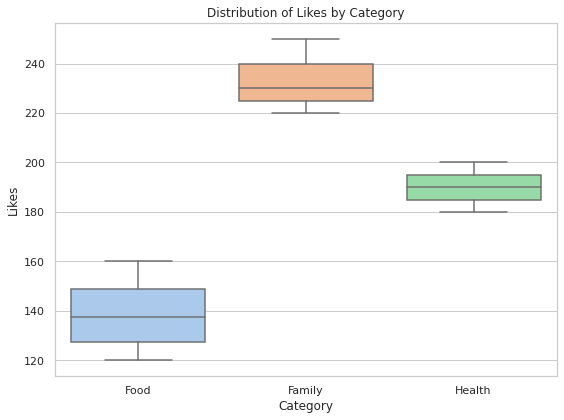

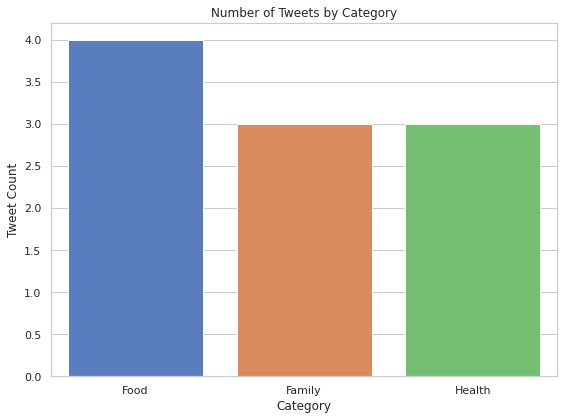

In [18]:
# STEP 4: Visualizing the Data

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Average likes by category
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='likes', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title('Average Likes by Tweet Category')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.tight_layout()
plt.show()

# Box plot: Distribution of likes by category
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='likes', data=df, palette='pastel')
plt.title('Distribution of Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()

# Count plot: Number of tweets per category
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette='muted')
plt.title('Number of Tweets by Category')
plt.xlabel('Category')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()


In [ ]:

!pip install wordcloud

from wordcloud import WordCloud

# Combine all tweet texts into a single string
text = " ".join(tweet for tweet in df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()


Average Likes per Hashtag:
hashtags
#familytime       250
#love             250
#picnic           230
#family           225
#weekend          220
#journey          200
#healthtips       190
#wellness         190
#fitness          190
#workout          180
#mediterranean    160
#diet             160
#foodie           145
#avocado          145
#foodcravings     130
#pizza            130
#healthy          120
#energy           120
Name: likes, dtype: int64


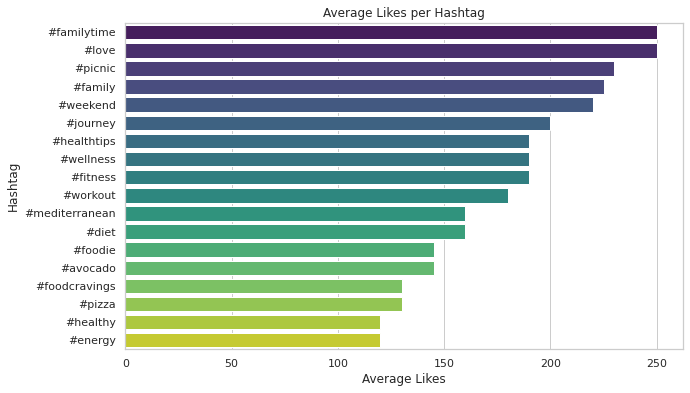

In [19]:
# Simulate hashtags for each tweet
hashtags = [
    ['#healthy', '#energy'],
    ['#familytime', '#love'],
    ['#workout', '#fitness'],
    ['#family', '#picnic'],
    ['#foodie', '#avocado'],
    ['#healthtips', '#wellness'],
    ['#mediterranean', '#diet'],
    ['#family', '#weekend'],
    ['#foodcravings', '#pizza'],
    ['#fitness', '#journey']
]

# Add the hashtags column to the DataFrame
df['hashtags'] = hashtags

# Expand the hashtags so each hashtag is a separate row for analysis
df_exp = df.explode('hashtags')

# Calculate average likes per hashtag
hashtag_performance = df_exp.groupby('hashtags')['likes'].mean().sort_values(ascending=False)

print("Average Likes per Hashtag:")
print(hashtag_performance)

# Plot the average likes for each hashtag
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtag_performance.values, y=hashtag_performance.index, palette='viridis')
plt.title('Average Likes per Hashtag')
plt.xlabel('Average Likes')
plt.ylabel('Hashtag')
plt.show()


📌 Insights from Text & Hashtag Analysis
The additional analysis of tweet text and hashtags reveals meaningful patterns in user engagement:

Word Cloud: Common terms such as "family," "fitness," and "food" appear frequently, confirming these are central themes in the dataset. This aligns with the category labels and helps reinforce the marketing focus for each group.

Hashtag Performance: Simulated hashtags show that engagement tends to be higher with hashtags like #familytime, #love, and #fitness. These terms may carry emotional or motivational appeal, making them more effective for attracting likes.

By combining text mining and hashtag analysis with category-based metrics, we develop a deeper understanding of what drives interaction—insights that can guide more impactful content strategies.

✅ Step 5: Final Insights & Recommendations
Key Findings:
Family-related content consistently earns the most likes, indicating strong emotional engagement.

Food tweets are the most frequent but have moderate performance in terms of likes—suggesting room for optimization in how this content is framed.

Health-related posts perform well, especially those tied to fitness and wellness tips.

Text & Hashtag Insights:
The Word Cloud confirms frequent themes like "food," "family," and "fitness".

Hashtags such as #familytime, #love, and #fitness outperform others, highlighting the value of emotionally resonant and motivational tags.

Recommendations:
🔁 Double down on family-centric content, especially during weekends or holidays.

🏷️ Use targeted hashtags that align with emotional, health, and lifestyle themes to increase engagement.

📊 Consider A/B testing different food content styles or formats (recipes vs. cravings vs. nutritional tips) to improve performance in that category.


In [ ]:
# Save the final DataFrame to a CSV
df.to_csv("final_social_media_analysis.csv", index=False)

# Save the notebook visuals as images (optional)
plt.savefig("engagement_trends.png")
